In [29]:
import bootstrap  # noqa
import pandas as pd

from ml_bias_explainability.bias_analysis import BiasAnalysis


In [7]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 20

def read_data():
    # The dataset used is taken from https://github.com/propublica/compas-analysis
    df = pd.read_csv("data/compas-scores-two-years.csv", index_col=0)

    # drop duplicate columns
    df = df.drop(columns=['decile_score.1', 'priors_count.1'])

    # Filter certain rows based on propublica analysis
    df = df[df.days_b_screening_arrest <= 30]
    df = df[df.days_b_screening_arrest >= -30]
    df = df[df.is_recid != -1]
    df = df[df.c_charge_degree != "O"]
    df = df[df.score_text != "N/A"]
    return df

df = read_data()
df

,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,start,end,event,two_year_recid
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,327,0,0
3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,9,159,1,1
4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,0,63,0,1
7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,0,1,0,0,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,13022355MM10A,2013-11-30,NaN,0.0,M,Battery,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,Low,2013-11-30,Risk of Violence,1,Low,2013-11-30,2013-11-30,2013-12-01,1,853,0,0
8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,0,6,0,0,14,-1.0,2014-02-18 05:08:24,2014-02-24 12:18:30,14002304CF10A,2014-02-18,NaN,1.0,F,Possession Burglary Tools,1,14004485CF10A,(F2),0.0,2014-03-31,Poss of Firearm by Convic Felo,2014-03-31,2014-04-18,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,Medium,2014-02-19,Risk of Violence,2,Low,2014-02-19,2014-03-31,2014-04-18,5,40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,0,7,0,0,0,-1.0,2013-11-22 05:18:27,2013-11-24 02:59:20,13016249CF10A,2013-11-22,NaN,1.0,F,Deliver Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,Medium,2013-11-23,Risk of Violence,5,Medium,2013-11-23,2013-11-22,2013-11-24,1,860,0,0
10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,0,3,0,0,0,-1.0,2014-01-31 07:13:54,2014-02-02 04:03:52,14001422CF10A,2014-01-31,NaN,1.0,F,Leaving the Scene of Accident,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,Low,2014-02-01,Risk of Violence,5,Medium,2014-02-01,2014-01-31,2014-02-02,1,790,0,0
10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,0,1,0,0,0,-1.0,2014-01-13 05:48:01,2014-01-14 07:49:46,14000581CF10A,2014-01-13,NaN,1.0,F,Aggravated Battery / Pregnant,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,Low,2014-01-14,Risk of Violence,1,Low,2014-01-14,2014-01-13,2014-01-14,0,808,0,0


A list of correlations between features of the dataset in descending order.
is_recid      two_year_recid    0.942816
              event             0.824560
event         two_year_recid    0.793184
end           two_year_recid    0.780066
decile_score  v_decile_score    0.777324
is_recid      end               0.752248
end           event             0.593970
age           v_decile_score    0.585911
decile_score  priors_count      0.447830
age           decile_score      0.403709
dtype: float64
A heatmap of all correlations above a defined threshold.


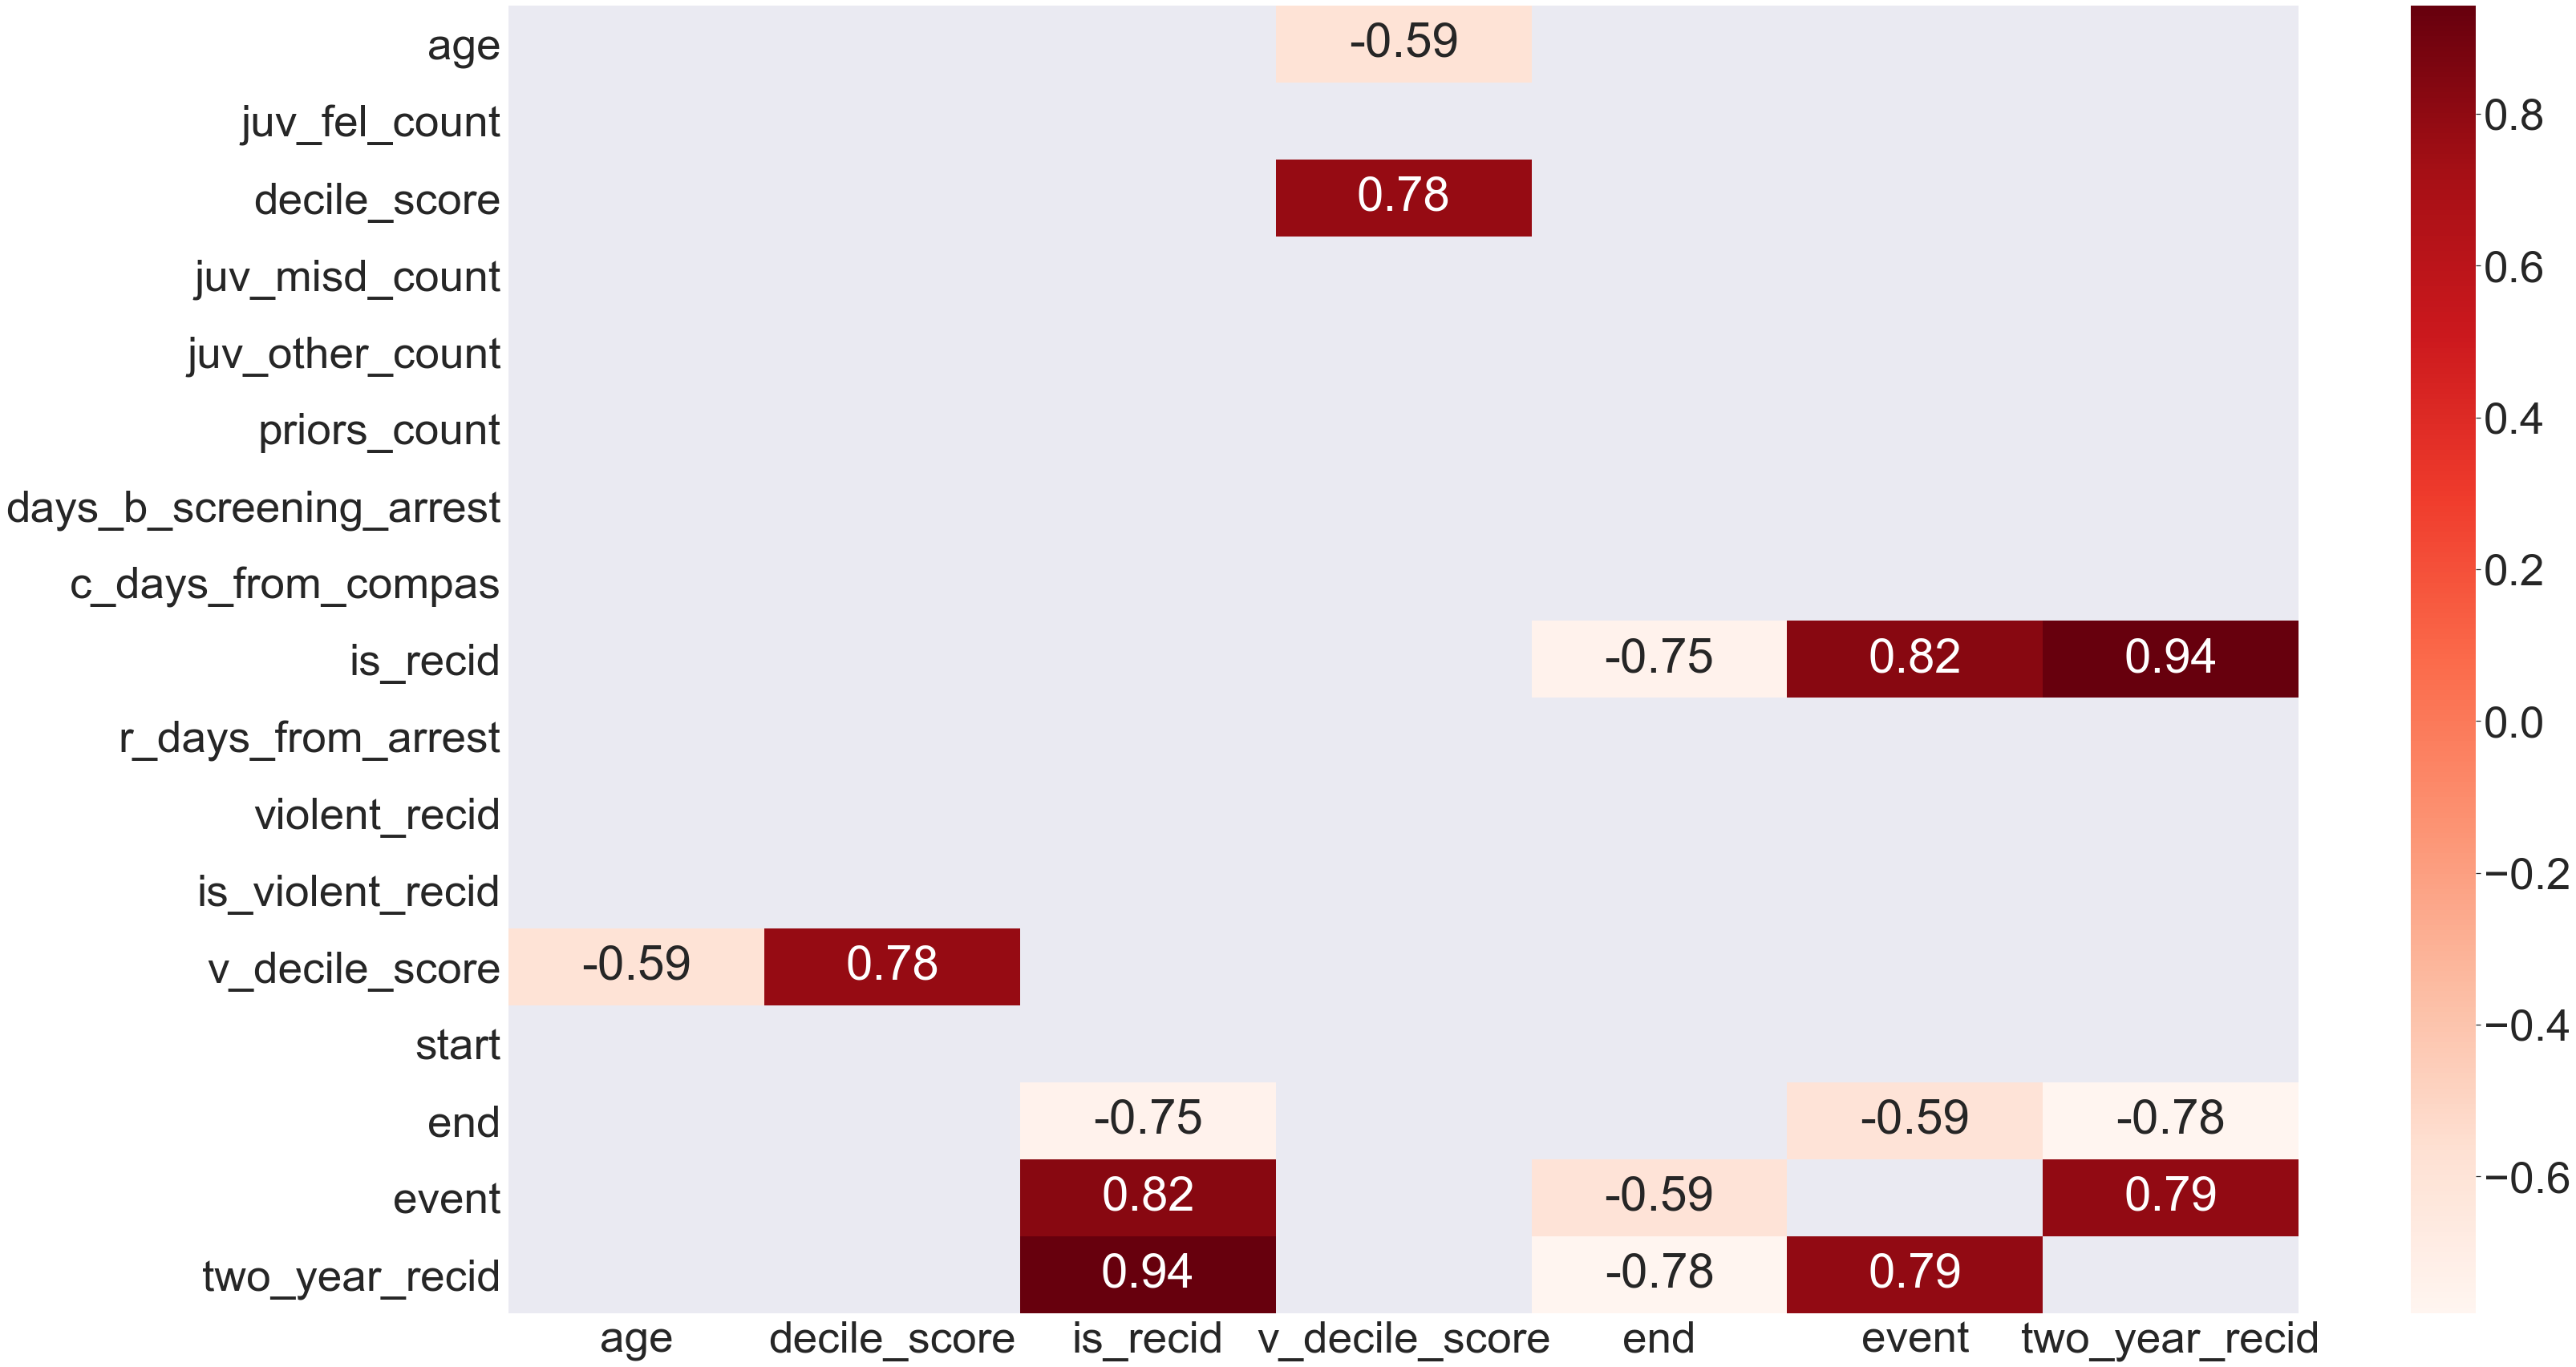

A breakdown of unbalanced occurrence of elements by feature.


The most common value occurs more than the least common column by a factor of 5964.0.

The most common element is: (0, 5964)
The least common element is: (10, 1)



The most common value occurs more than the least common column by a factor of 5820.0.

The most common element is: (0, 5820)
The least common element is: (13, 1)



The most common value occurs more than the least common column by a factor of 5711.0.

The most common element is: (0, 5711)
The least common element is: (6, 1)



The most common value occurs more than the least common column by a factor of 5388.0.

The most common element is: (nan, 5388)
The least common element is: ('2014-02-26', 1)



The most common value occurs more than the least common column by a factor of 5480.0.

The most common element is: (nan, 5480)
The least common element is: ('15015652CF10A', 1)



The most common value occurs more than the least common column by a factor of 5480.0.


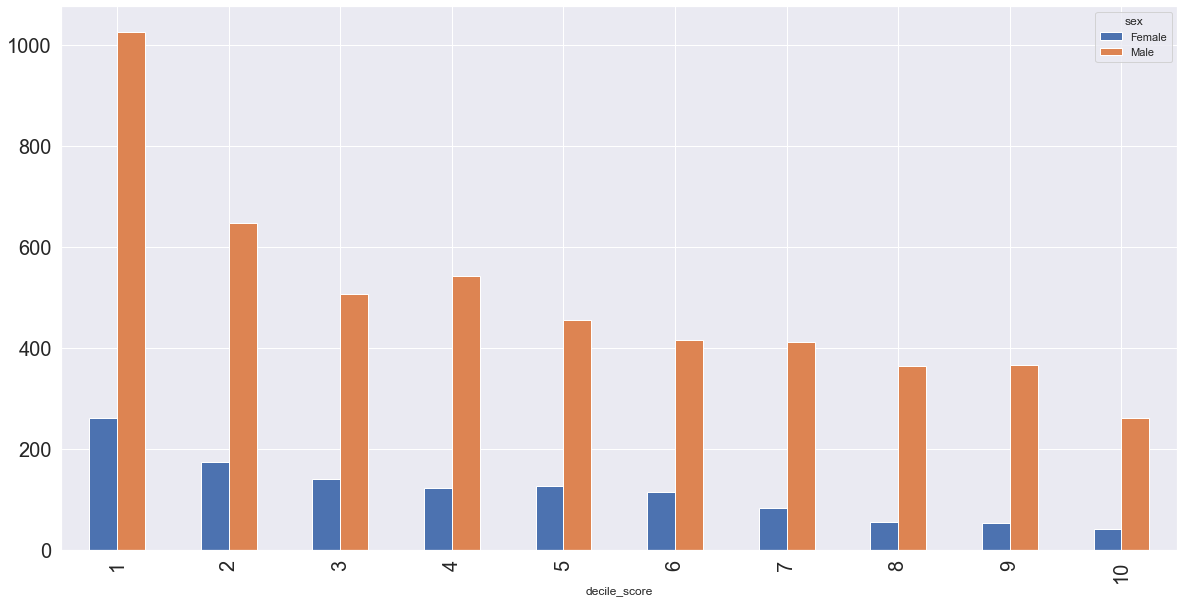

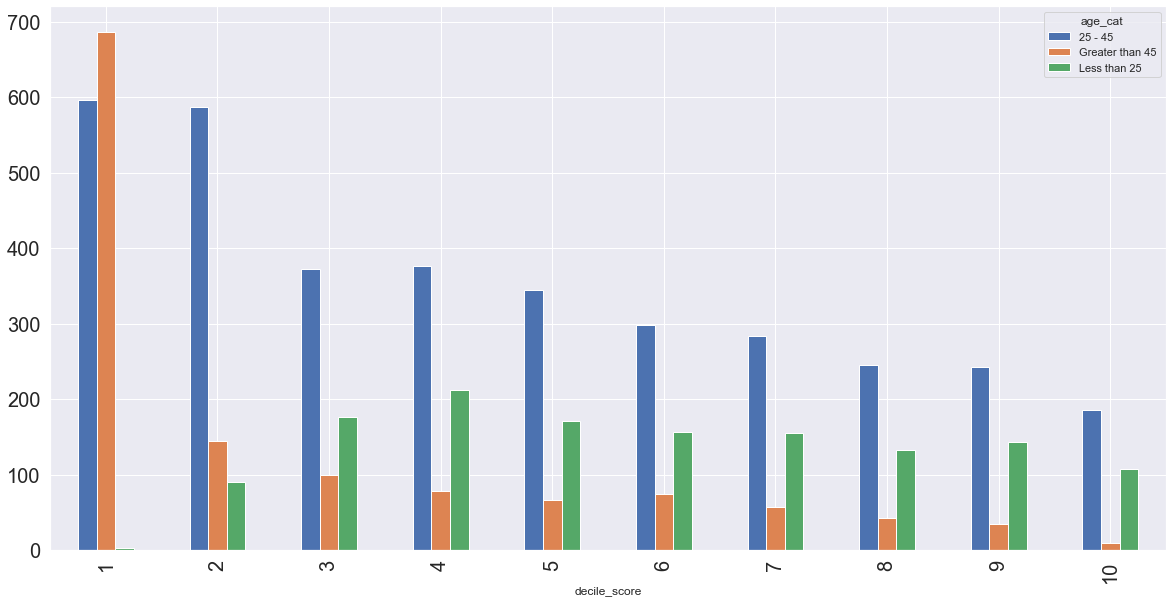

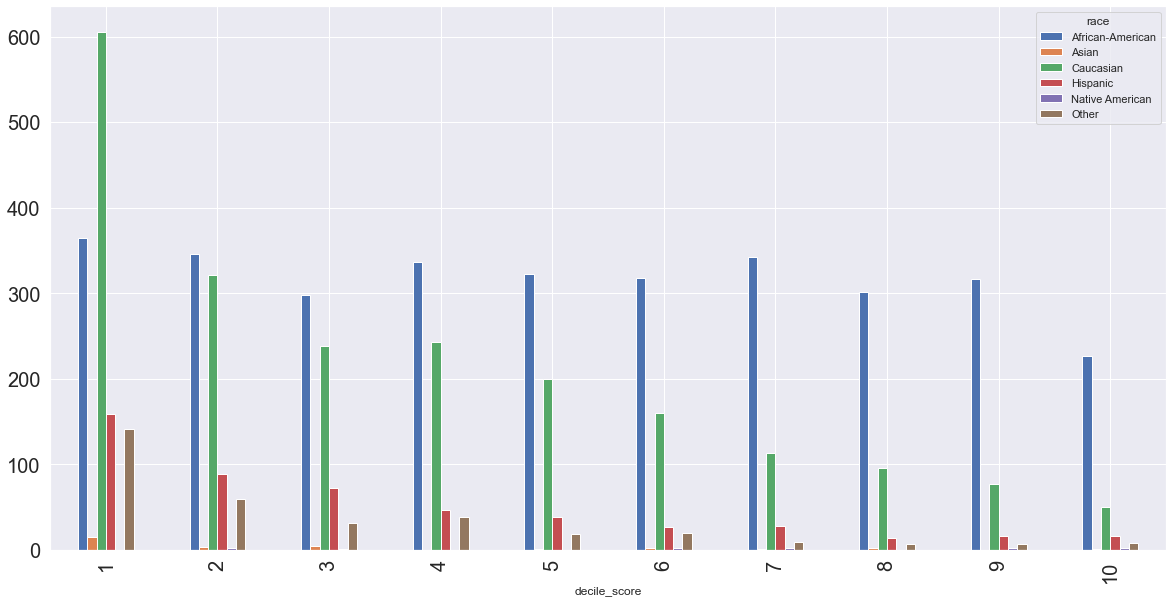

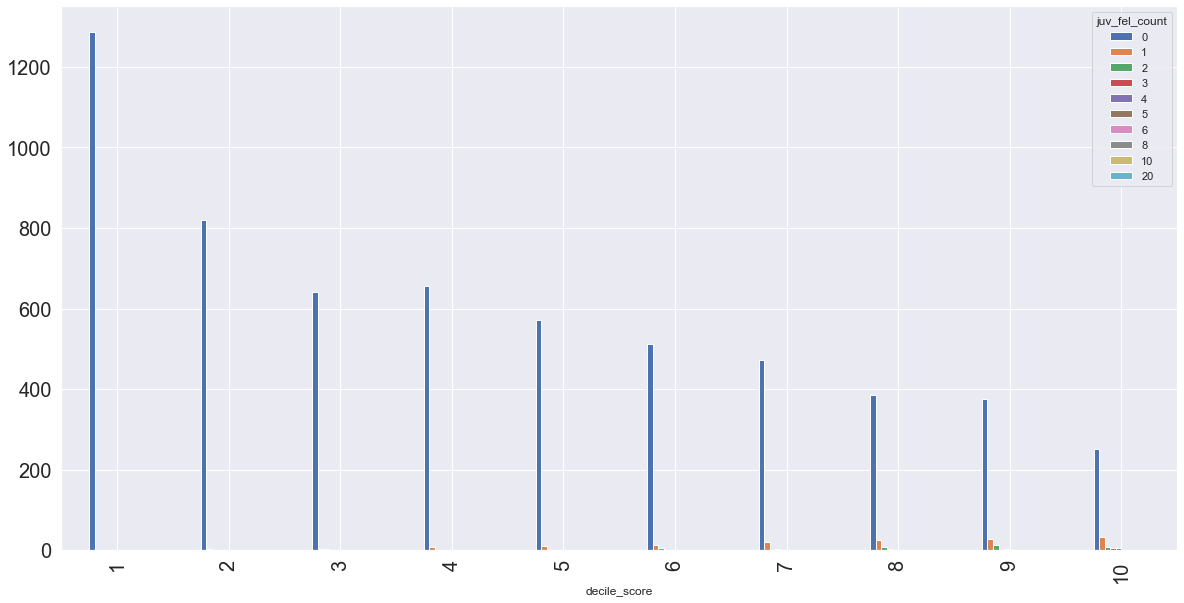

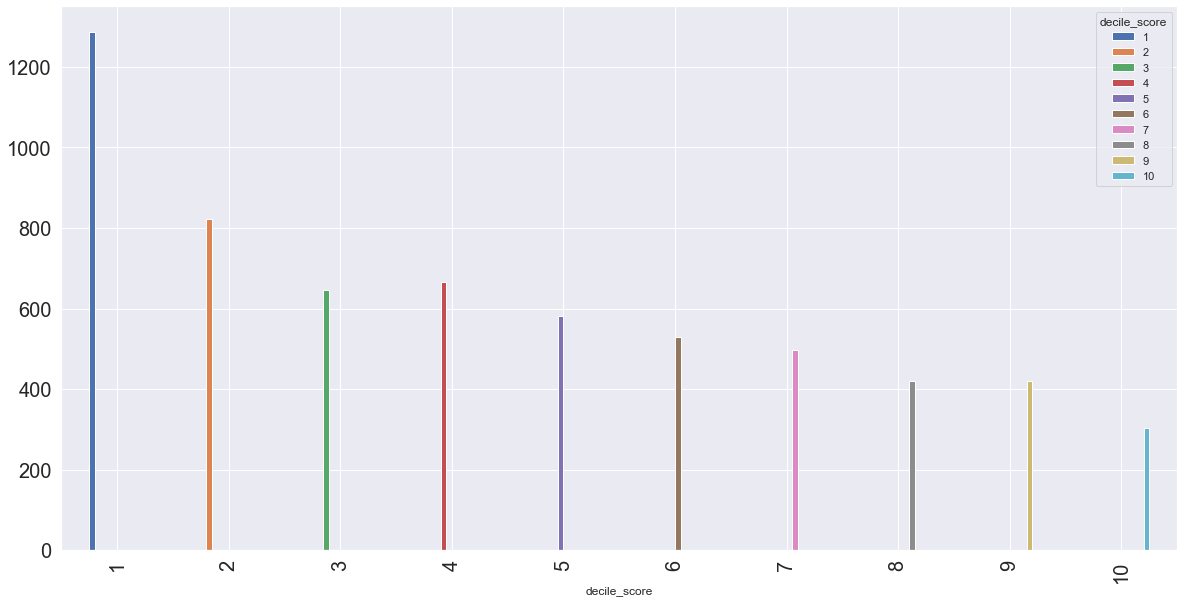

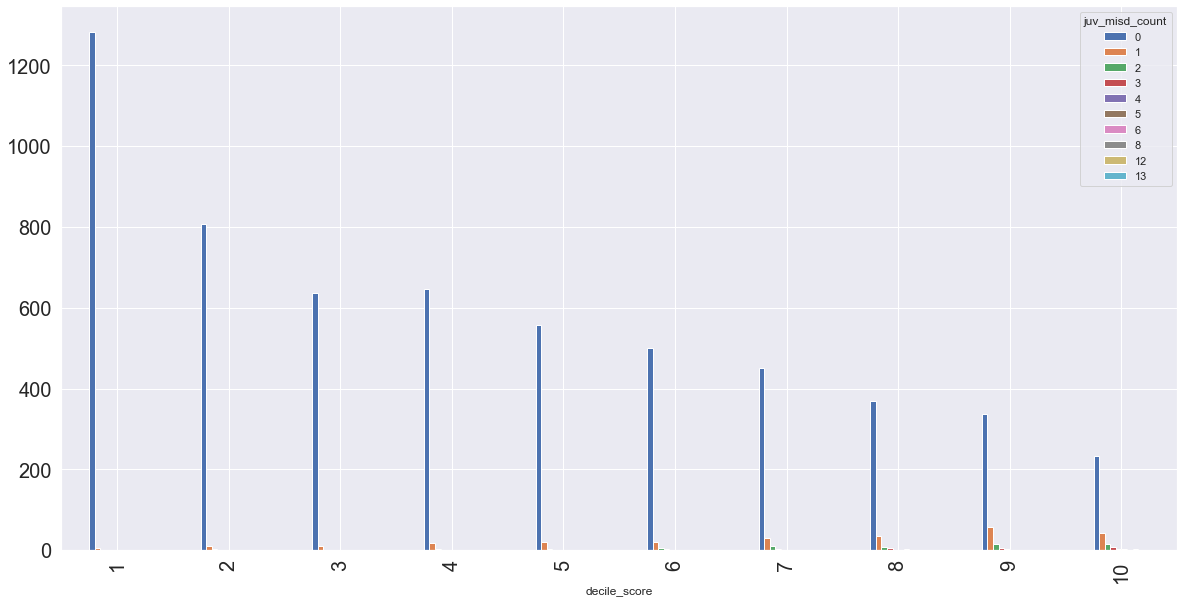

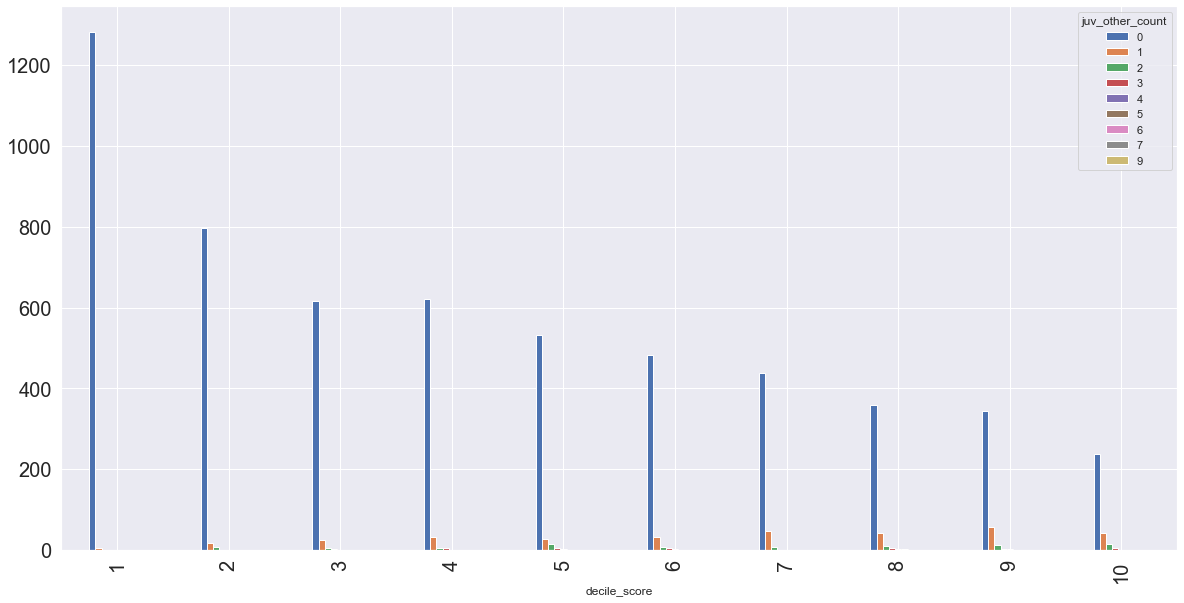

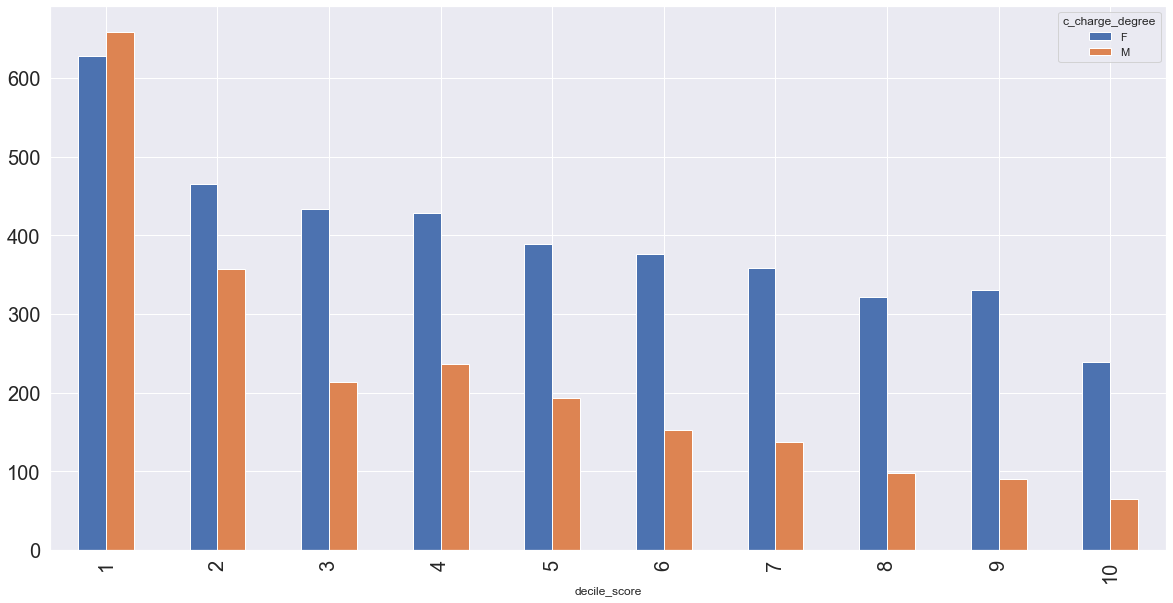

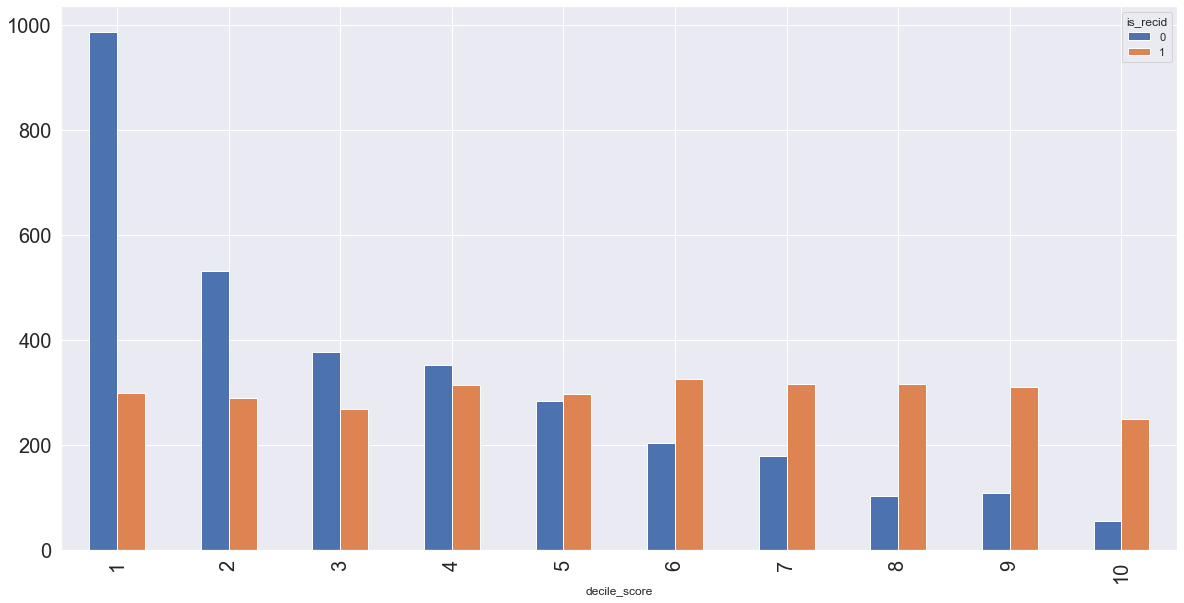

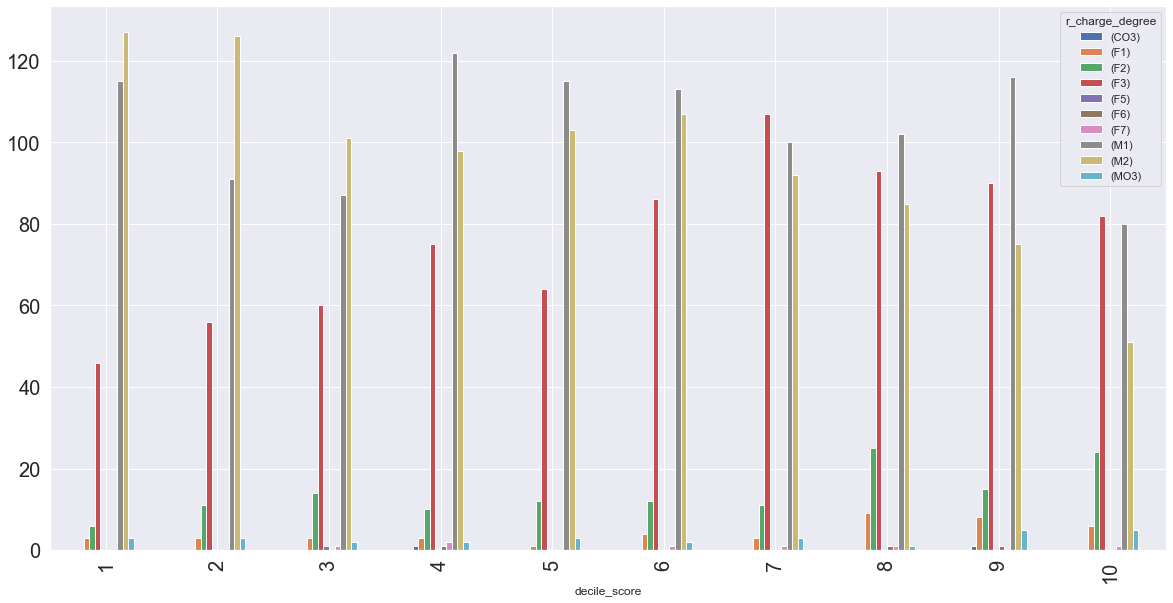

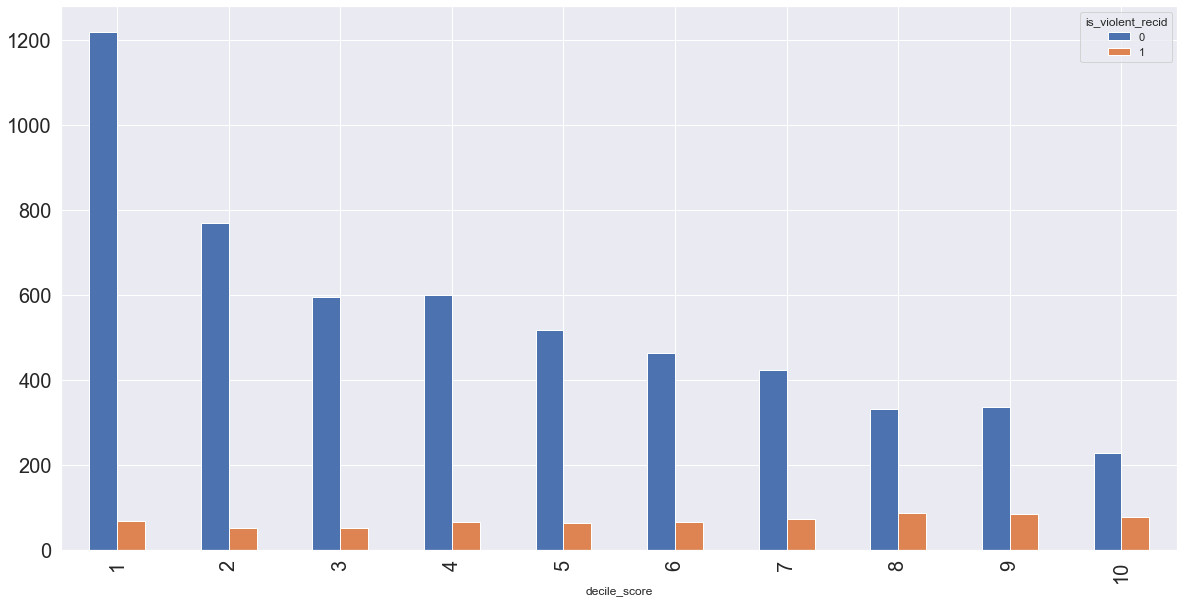

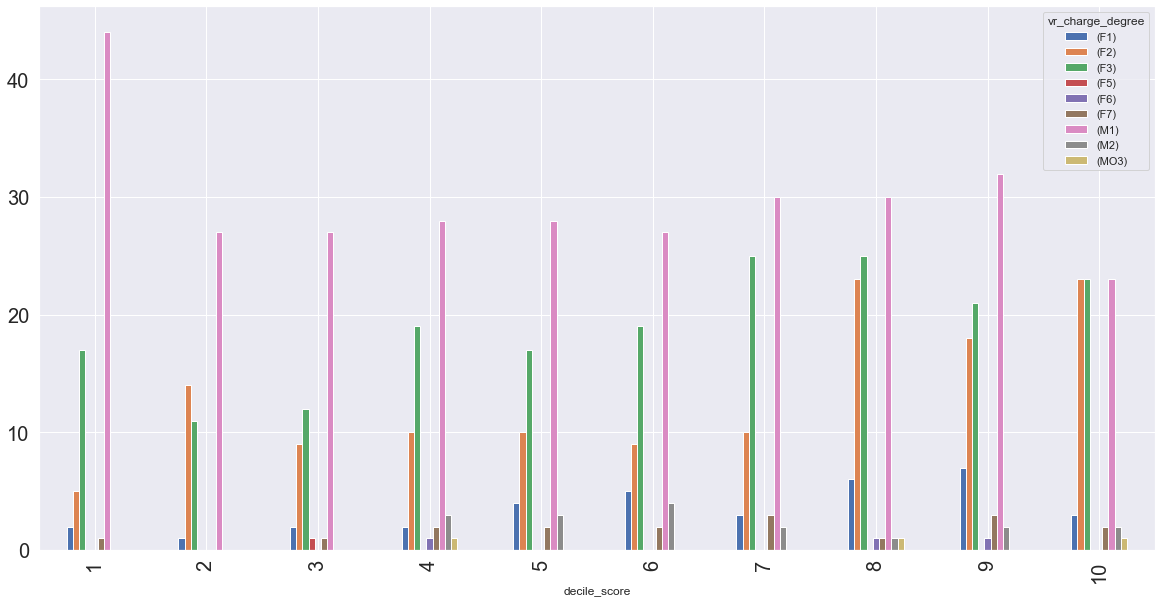

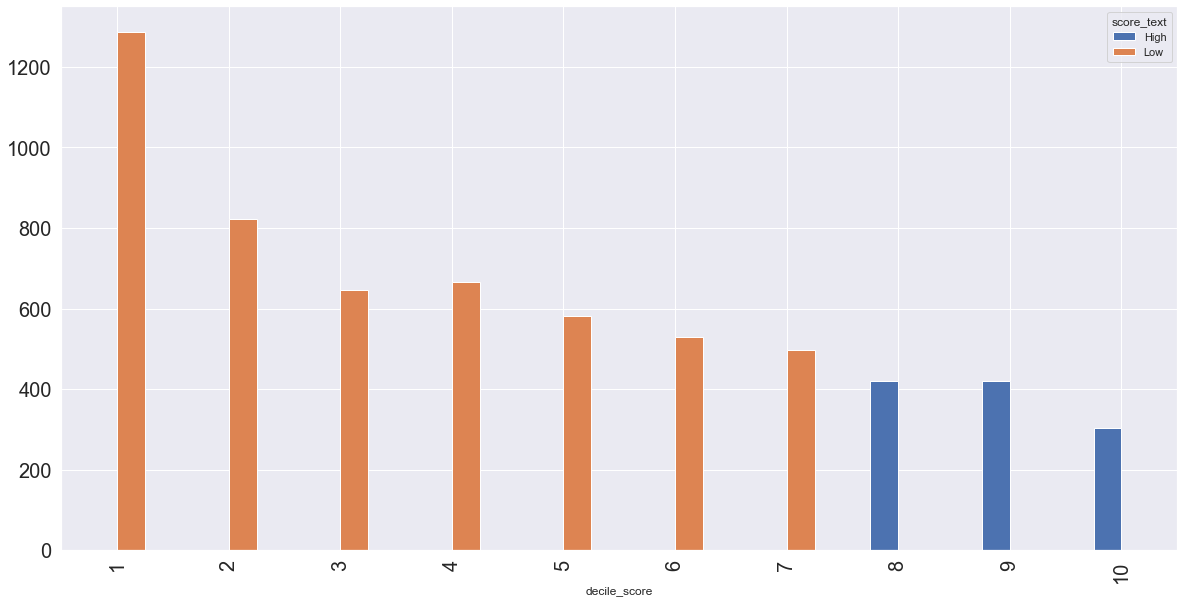

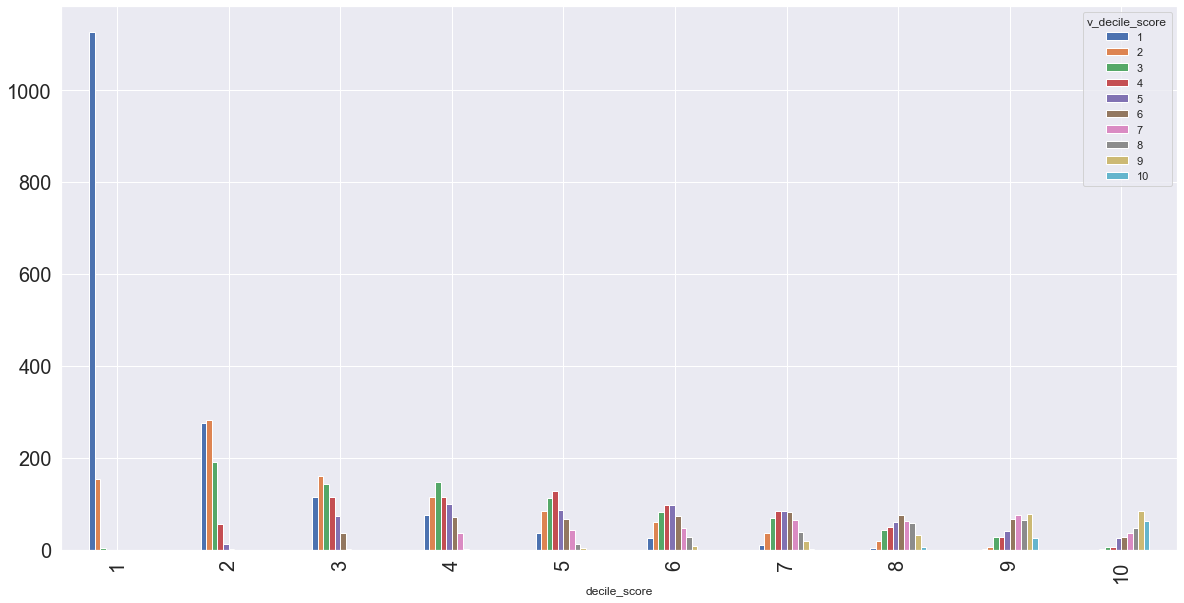

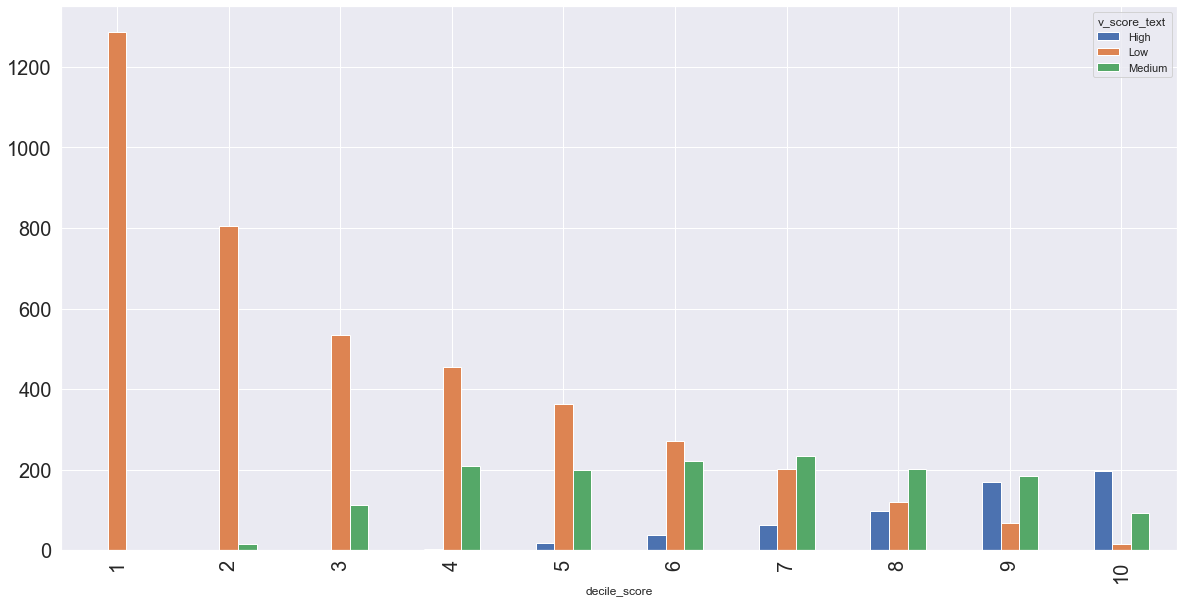

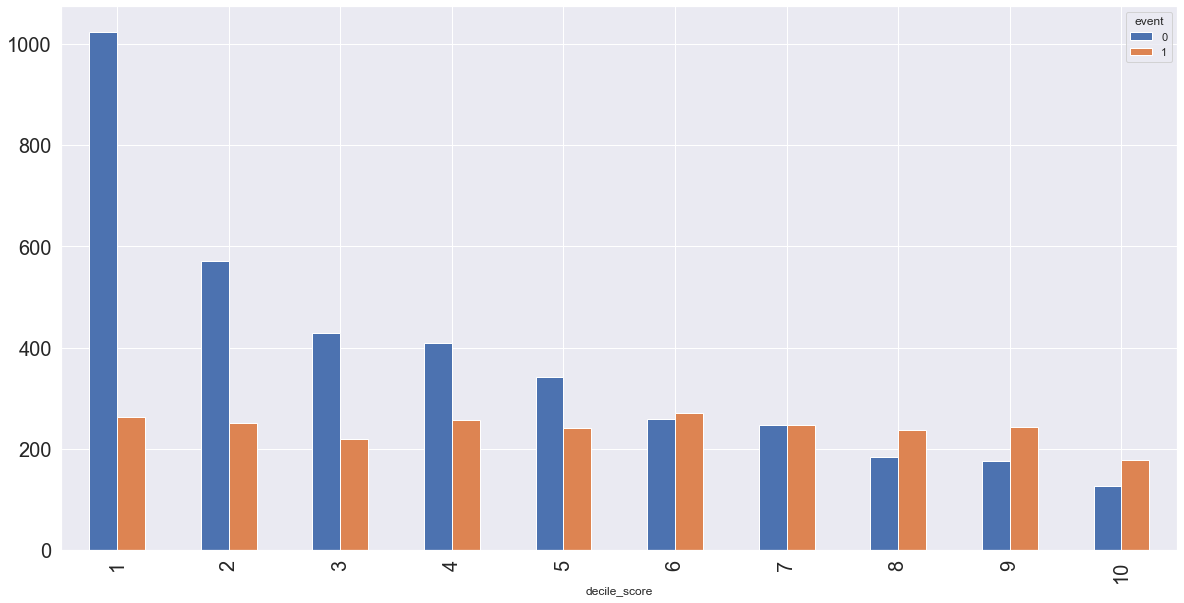

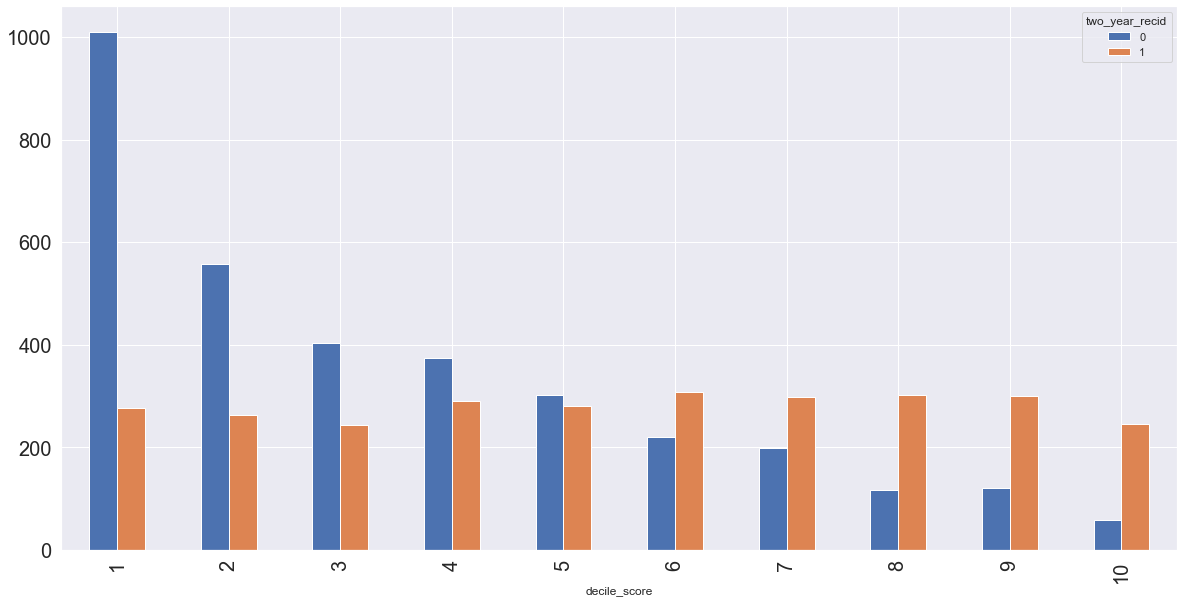

A logistic regression analysis of differences in output between different feature values.
                            Generalized Linear Model Regression Results                            
Dep. Variable:     ['score_text[High]', 'score_text[Low]']   No. Observations:                 6172
Model:                                                 GLM   Df Residuals:                     6160
Model Family:                                     Binomial   Df Model:                           11
Link Function:                                       logit   Scale:                          1.0000
Method:                                               IRLS   Log-Likelihood:                -2234.5
Date:                                     Thu, 22 Apr 2021   Deviance:                       4468.9
Time:                                             11:41:45   Pearson chi2:                 6.02e+03
No. Iterations:                                          6                                         
Covariance

'Pipeline has finished running.'

In [8]:
output_feature = "decile_score"
correlation_plot_threshold = 0.5
minimum_unbalanced_ratio = 0.0002
unique_values_threshold = 10
significant_output_threshold = 0.2
input_features = [
    "sex",
    "age_cat",
    "race",
    "priors_count",
    "c_charge_degree",
    "two_year_recid",
]

df["score_text"] = df["score_text"].map({"Low": "Low", "Medium": "Low", "High": "High"})
binary_output_feature = "score_text"

BiasAnalysis().run_pipeline(
    df,
    input_features,
    output_feature,
    binary_output_feature,
    correlation_plot_threshold,
    minimum_unbalanced_ratio,
    unique_values_threshold,
    significant_output_threshold,
)